# Case Study 1: Predicting Insurance Claim Severity

objective: Given a claim record task is to predict the loss value of a particular claim as accurately as possible.

https://medium.com/nerd-for-tech/a-kaggle-competition-allstate-claims-severity-a32f4635c849

## Data Exploration & Preprocessing:

o Identify the key variables in the dataset.



o Explain any transformations (such as log transformations) that might be
necessary to address skewness or heteroscedasticity.


In [64]:
import pandas as pd 
df=pd.read_csv(r"C:\MCA\placement\digit\allstate-claims-severity\train.csv")
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [65]:
print("Data shape:", df.shape)




Data shape: (188318, 132)


In [66]:
print("\nData types and missing values:")
df.info()



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [67]:
print("\nSummary statistics:")
df.describe()


Summary statistics:


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


o Discuss potential data quality issues (e.g., missing values, outliers) and propose
methods for cleaning and preprocessing the data.

In [68]:
# Check missing values
print(df.isnull().sum())

id        0
cat1      0
cat2      0
cat3      0
cat4      0
         ..
cont11    0
cont12    0
cont13    0
cont14    0
loss      0
Length: 132, dtype: int64


No missing values

if missing values is present: 

Fill missing values with mean (for numerical) or mode (for categorical)

->df.fillna(df.mean(), inplace=True)

->df.fillna(df.mode().iloc[0], inplace=True)

In [69]:
# Check for duplicates
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [70]:
# Drop the ID column (not useful for predictions)
df.drop(columns=["id"], inplace=True)

In [71]:
counts_categorical = []
continous_features = []
categorical_features = []
for i in df.columns: # counting the number of categorical and continous features
    if 'cat' in i:
        #categorical_features_count += 1
        counts_categorical.append(len(df[i].value_counts()))  # counting the number of classes for each variable
        categorical_features.append(i)
    elif 'cont' in i:
        continous_features.append(i)
        #continous_features_count += 1

print(" In in data set we have {} categorical and {} continuous valued features".format(len(categorical_features),len(continous_features)))

     

 In in data set we have 116 categorical and 14 continuous valued features


In [72]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cont_cols = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
             if col != 'loss']
target_col = 'loss'


print("\nCategorical columns:", len(cat_cols))
print("Continuous columns:", len(cont_cols))


Categorical columns: 116
Continuous columns: 14


In [73]:
# Check unique values in categorical columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

cat1: 2 unique values
cat2: 2 unique values
cat3: 2 unique values
cat4: 2 unique values
cat5: 2 unique values
cat6: 2 unique values
cat7: 2 unique values
cat8: 2 unique values
cat9: 2 unique values
cat10: 2 unique values
cat11: 2 unique values
cat12: 2 unique values
cat13: 2 unique values
cat14: 2 unique values
cat15: 2 unique values
cat16: 2 unique values
cat17: 2 unique values
cat18: 2 unique values
cat19: 2 unique values
cat20: 2 unique values
cat21: 2 unique values
cat22: 2 unique values
cat23: 2 unique values
cat24: 2 unique values
cat25: 2 unique values
cat26: 2 unique values
cat27: 2 unique values
cat28: 2 unique values
cat29: 2 unique values
cat30: 2 unique values
cat31: 2 unique values
cat32: 2 unique values
cat33: 2 unique values
cat34: 2 unique values
cat35: 2 unique values
cat36: 2 unique values
cat37: 2 unique values
cat38: 2 unique values
cat39: 2 unique values
cat40: 2 unique values
cat41: 2 unique values
cat42: 2 unique values
cat43: 2 unique values
cat44: 2 unique valu

In [74]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
    print(f"Unique values: {sorted(unique_values)}")
    print("-" * 50)

cat1: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat2: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat3: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat4: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat5: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat6: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat7: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat8: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat9: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat10: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat11: 2 

In [75]:
# prints only first 10 unique values

# for col in cat_cols:
#     unique_values = df[col].unique()
#     print(f"{col}: {len(unique_values)} unique values")
#     if len(unique_values) > 10:
#         print(f"First 10 unique values: {sorted(unique_values)[:10]}")
#     else:
#         print(f"Unique values: {sorted(unique_values)}")
#     print("-" * 50)

outliers

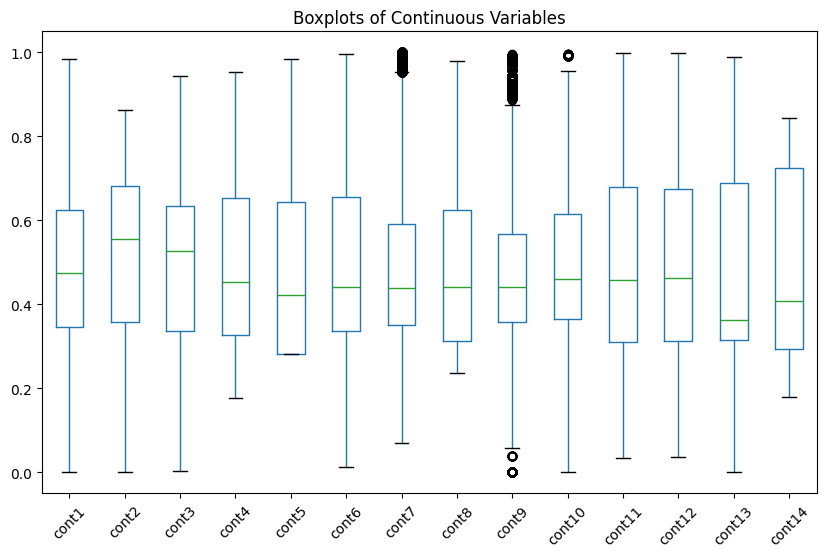

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10, 6))
df[cont_cols].boxplot()
plt.xticks(rotation=45)
plt.grid(False)
plt.title('Boxplots of Continuous Variables')
plt.show()

Outlier Detection in loss (Claim Amount)

Max value: 121,012.25 (extremely high compared to other percentiles)

75th percentile: 3,864.04

Mean: 3,037.34

Median (50th percentile): 2,115.57


Red Flags:

The maximum claim amount is 31x higher than the 75th percentile.

Right-skewed distribution (mean > median).

In [77]:
import pandas as pd
import numpy as np

# Calculate outlier thresholds (IQR method)
Q1 = df['cont7'].quantile(0.25)
Q3 = df['cont7'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outliers: {len(df[df['cont7'] > upper_bound])}")
print(f"% of outliers: {len(df[df['cont7'] > upper_bound]) / len(df) * 100:.2f}%")

Upper bound for outliers: 0.95
Number of outliers: 2659
% of outliers: 1.41%


In [78]:
import pandas as pd
import numpy as np

# Calculate outlier thresholds (IQR method)
Q1 = df['cont9'].quantile(0.25)
Q3 = df['cont9'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outliers: {len(df[df['cont9'] > upper_bound])}")
print(f"% of outliers: {len(df[df['cont9'] > upper_bound]) / len(df) * 100:.2f}%"
      )

Upper bound for outliers: 0.88
Number of outliers: 12988
% of outliers: 6.90%


In [79]:
import pandas as pd
import numpy as np

# Calculate outlier thresholds (IQR method)
Q1 = df['loss'].quantile(0.25)
Q3 = df['loss'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound for outliers: {upper_bound:.2f}")
print(f"Number of outliers: {len(df[df['loss'] > upper_bound])}")
print(f"% of outliers: {len(df[df['loss'] > upper_bound]) / len(df) * 100:.2f}%")

Upper bound for outliers: 7853.42
Number of outliers: 11554
% of outliers: 6.14%


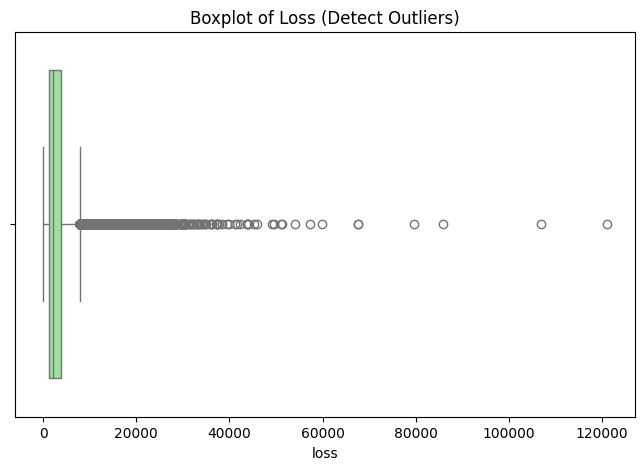

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['loss'], color='lightgreen')
plt.title('Boxplot of Loss (Detect Outliers)')
plt.show()

feature engineering

didnt go with one hot encoding as it increases the no of columns

encoding

In [81]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df.select_dtypes(include=['object']).columns

# Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


df.head()


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0,1,0,1,0,0,0,0,1,0,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,0,1,0,0,0,0,0,0,1,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,0,1,0,0,1,0,0,0,1,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,1,1,0,1,0,0,0,0,1,0,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,0,1,0,1,0,0,0,0,1,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


Label Encoding: Label encoding algorithm is quite simple and it considers an order for encoding, Hence can be used for encoding ordinal data. 

One-Hot Encoding: To overcome the Disadvantage of Label Encoding as it considers some hierarchy in the columns which can be misleading to nominal features present in the data. we can use the One-Hot Encoding strategy. 
One-hot encoding is processed in 2 steps:

Splitting of categories into different columns.
Put ‘0 for others and ‘1’ as an indicator for the appropriate column.

one hot encoding is not used as One-Hot Encoding will create too many columns so i am using label encoding

One-Hot Encoding creates separate columns for each category, while Label Encoding assigns a numerical value to each category within a column.

Your dataset has 116 categorical columns (cat1 to cat116).

One-Hot Encoding would create hundreds or thousands of columns, making the dataset too large and sparse.

Label Encoding keeps the dataset compact and is suitable for models like Random Forest, XGBoost, and Gradient Boosting (which handle numerical labels well).

In [82]:

# categorical_features = df.select_dtypes(include=["object"]).columns.tolist()
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# df.head()

#### Standardize Continuous Features:

Why: cont1–cont14 are on different scales.

Purpose:

Centers all continuous features to mean=0 and std=1.

Critical for models sensitive to feature scales (e.g., regression, neural networks).

Why Not Normalize (MinMaxScaler)?

Your cont columns are already in [0,1] range (from the stats you shared).

Standardization is preferred when outliers exist (handled better than MinMax).



In [83]:
# z score : Mean = 0  Standard Deviation = 1



from sklearn.preprocessing import StandardScaler

cont_cols = [col for col in df.columns if col.startswith('cont')]

scaler = StandardScaler()

df[cont_cols] = scaler.fit_transform(df[cont_cols])

df[cont_cols].describe().round(2)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00,188318.00
mean,-0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.63,-2.44,-2.46,-1.49,-0.99,-2.33,-2.33,-1.25,-2.67,-2.68,-2.18,-2.18,-2.32,-1.42
25%,-0.79,-0.72,-0.80,-0.78,-0.99,-0.75,-0.76,-0.87,-0.70,-0.72,-0.87,-0.87,-0.83,-0.90
50%,-0.10,0.23,0.14,-0.18,-0.31,-0.24,-0.26,-0.23,-0.24,-0.20,-0.17,-0.15,-0.61,-0.40
75%,0.69,0.84,0.67,0.76,0.75,0.80,0.59,0.69,0.45,0.63,0.88,0.87,0.93,1.03
max,2.62,1.72,2.20,2.19,2.37,2.47,2.89,2.48,2.81,2.67,2.41,2.41,2.33,1.57


Log transform the target variable to handle skewness

In [84]:
skewness = df['loss'].skew()
print(f"Skewness coefficient: {skewness:.2f}")

Skewness coefficient: 3.79


positive skewness as its 3.79 (right skewness)

Skewness can be defined as a statistical measure that describes the lack of symmetry or asymmetry in the probability distribution of a dataset. 

It quantifies the degree to which the data deviates from a perfectly symmetrical distribution, such as a normal (bell-shaped) distribution. 



Skewness Coefficient (Pearson's First Coefficient of Skewness): 

This is a numerical measure of skewness, which determines the skewness when mean and mode are not equal. It is calculated as:

Skewness as per Karl Pearson's Measure

Skewness = Mean - Mode

Skewness of Karl Pearson's Measure

If mean is greater than mode, the skewness will consist positive value.

In case of mean is smaller than mode, the skewness will be a negative value.

In case of equality of mean and mode, the skewness will be zero.

In a positively skewed distribution, the tail on the right side (the larger values) is longer than the tail on the left side (the smaller values). This means that the majority of data points are concentrated on the left side of the distribution, and there are some extreme values on the right side. In the case of a positively skewed dataset,

Mean > Median > Mode

In a negatively skewed distribution, the tail on the left side (the smaller values) is longer than the tail on the right side (the larger values). This implies that most of the data points are concentrated on the right side of the distribution, with a few extreme values on the left side. In the case of a negatively skewed dataset,

Mean < Median < Mode

Zero Skewness (Symmetrical Distribution)
Zero skewness indicates a perfectly symmetrical distribution, where the mean, median, and mode are equal. In a symmetrical distribution, the data points are evenly distributed around the central point.

1. Histograms (Check Distributions & Outliers)


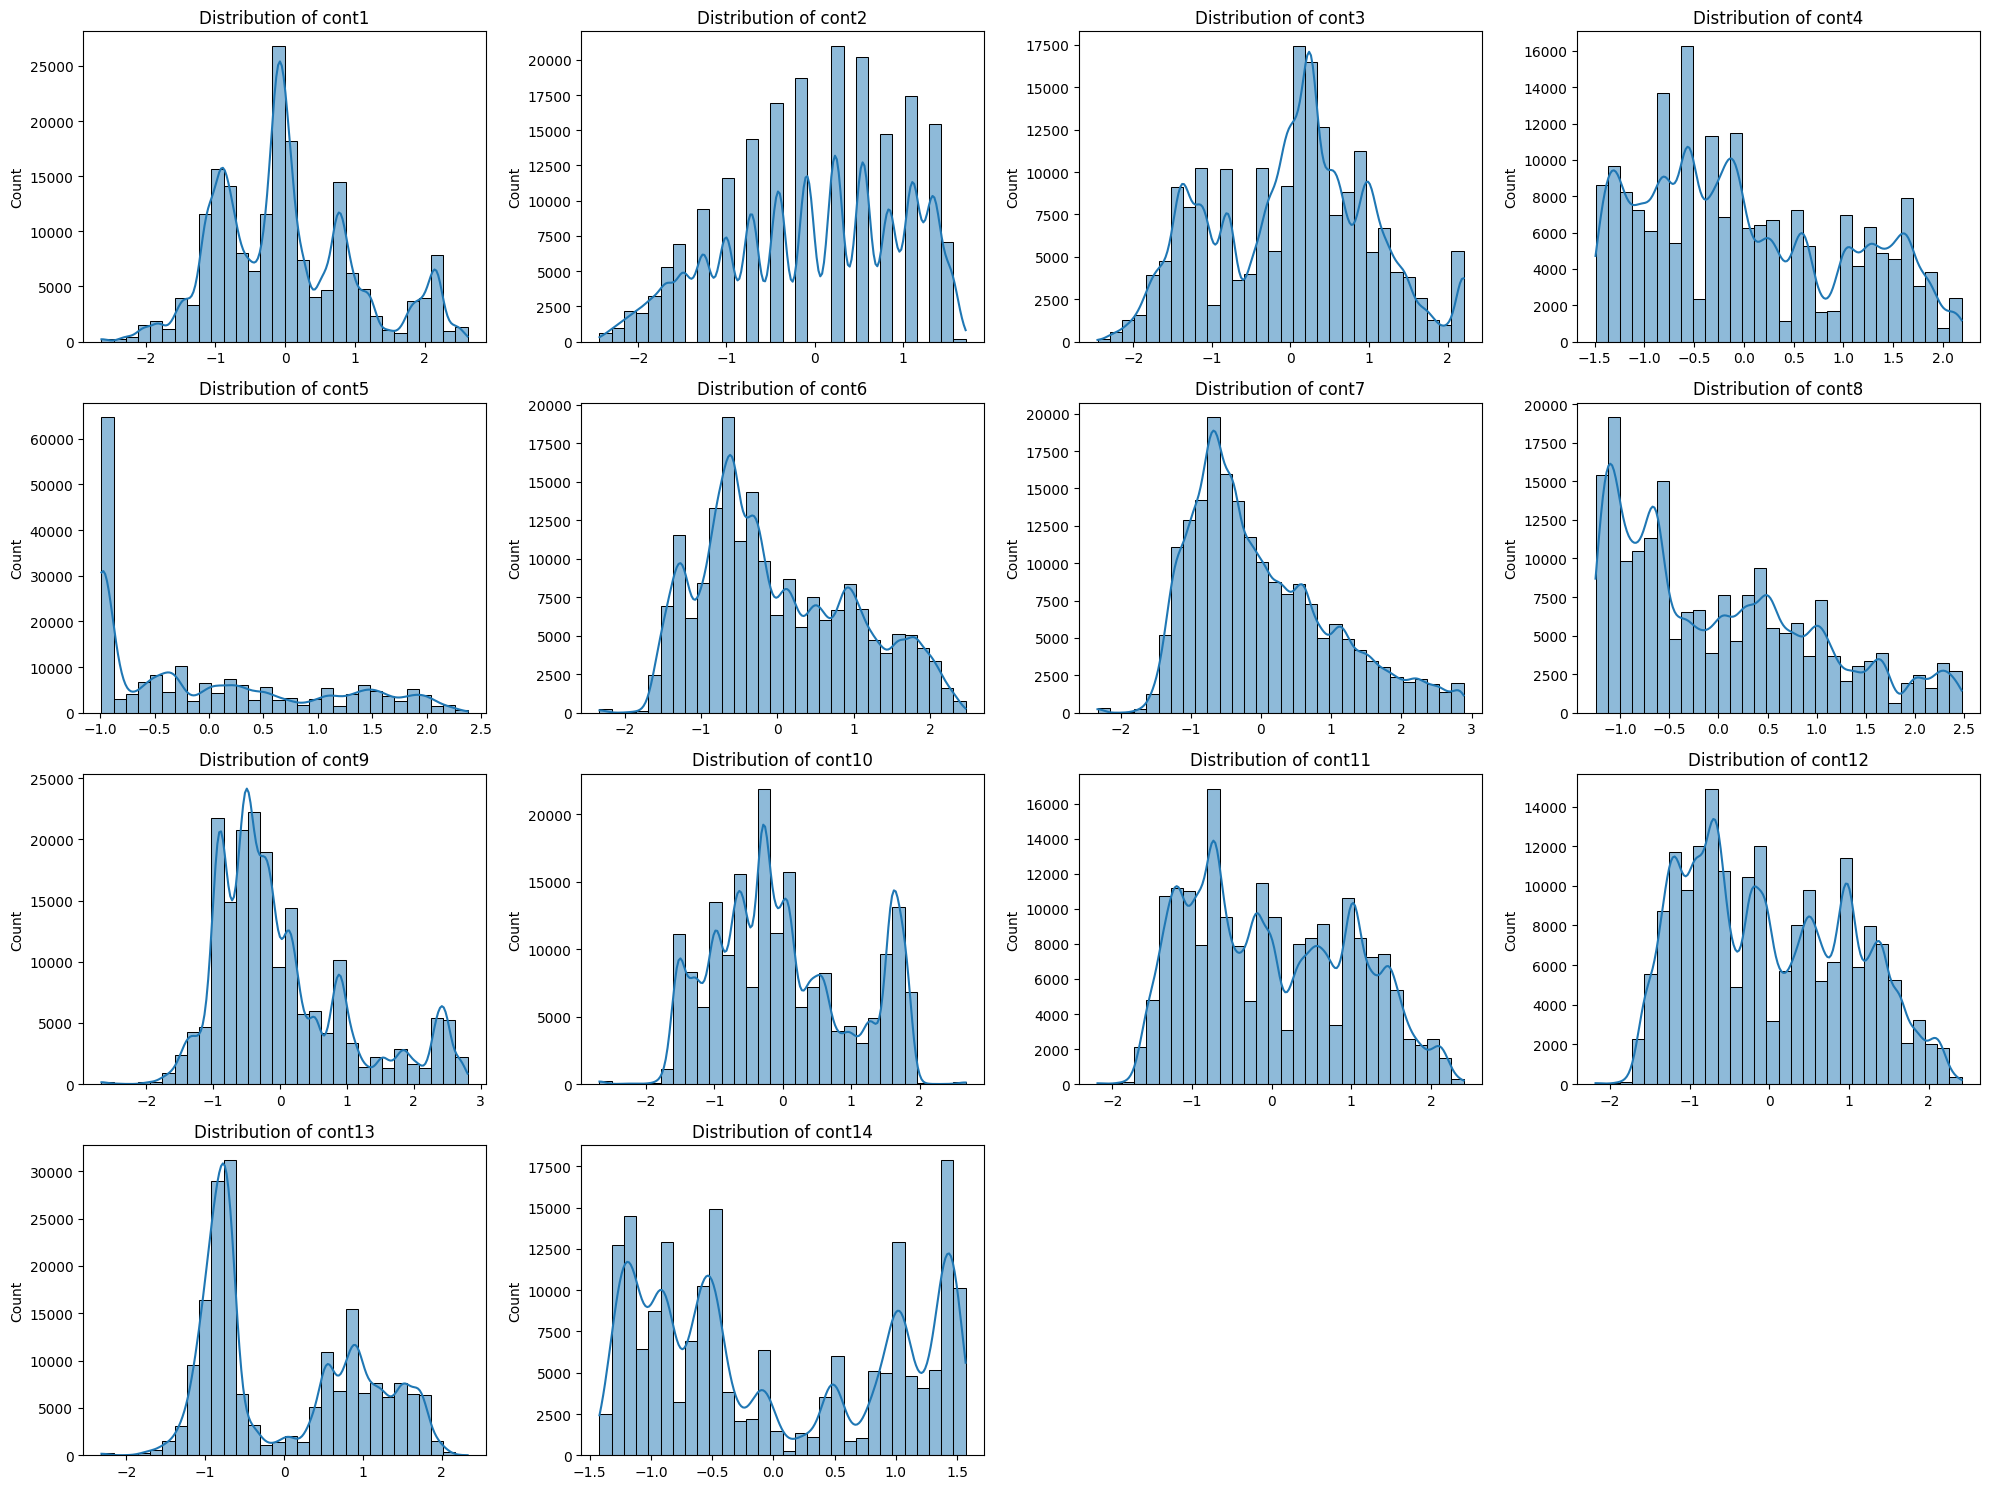

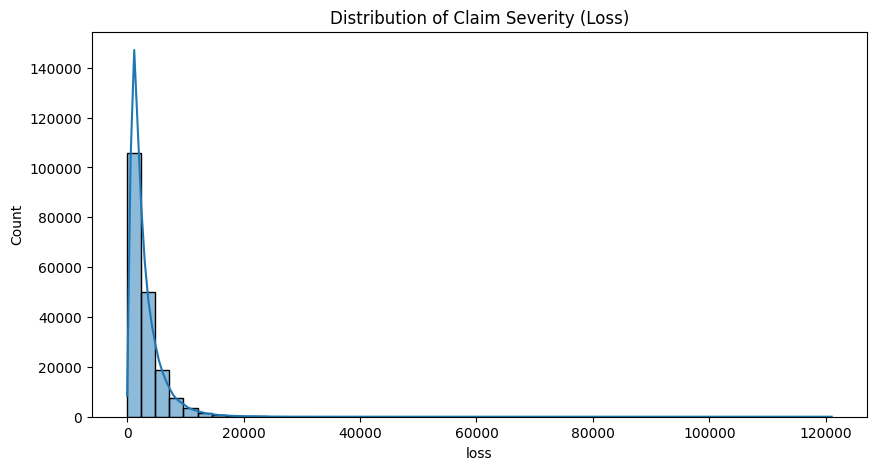

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# -------------------------------------------------------------------
# 1. Histograms (Univariate Analysis)
# -------------------------------------------------------------------
print("="*50)
print("1. Histograms (Check Distributions & Outliers)")
print("="*50)

# Plot histograms for continuous features
cont_cols = [f'cont{i}' for i in range(1, 15)]
plt.figure(figsize=(20, 15))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

# Histogram for target variable (loss)
plt.figure(figsize=(10, 5))
sns.histplot(df['loss'], kde=True, bins=50)
plt.title('Distribution of Claim Severity (Loss)')
plt.show()



C:\Users\kkuma\AppData\Local\Temp\ipykernel_13580\3653097444.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['log_loss'] = np.log1p(df['loss'])  # Using log1p to handle zeros


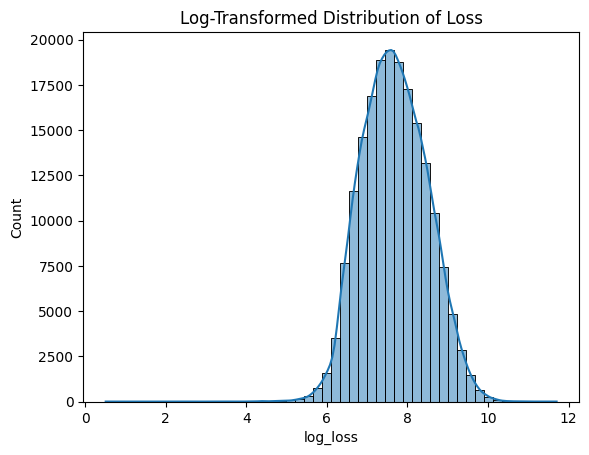

In [86]:
df['log_loss'] = np.log1p(df['loss'])  # Using log1p to handle zeros
# df['log_loss'] = np.log1p(df['loss'])
sns.histplot(df['log_loss'], kde=True, bins=50)
plt.title('Log-Transformed Distribution of Loss')
plt.show()

Box-Cox Transformation (if no zeros):

python
Copy
transformed, _ = stats.boxcox(df['loss'] + 1)  # +1 to handle zeros
sns.histplot(transformed, kde=True, bins=50)
plt.title('Box-Cox Transformed Distribution of Loss')
plt.show()

# Exploratory Data Analysis (EDA)

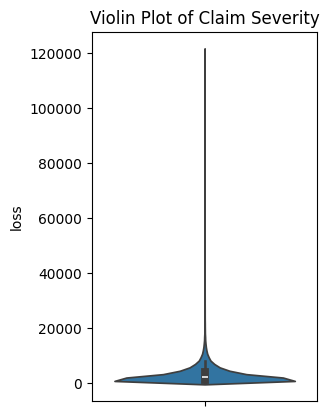

In [89]:
plt.subplot(1, 2, 2)
sns.violinplot(y=df['loss'])
plt.title('Violin Plot of Claim Severity')
plt.show()

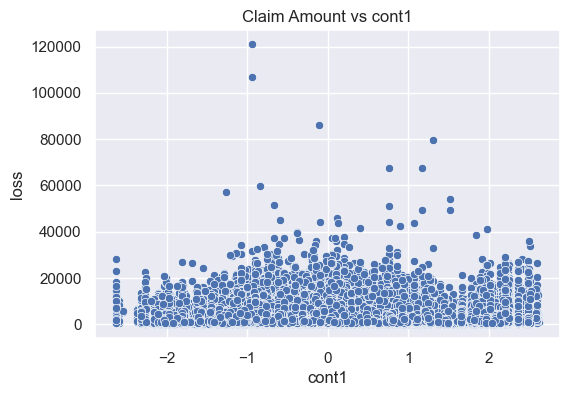

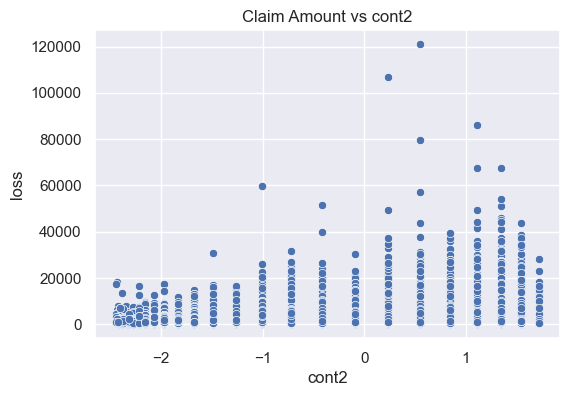

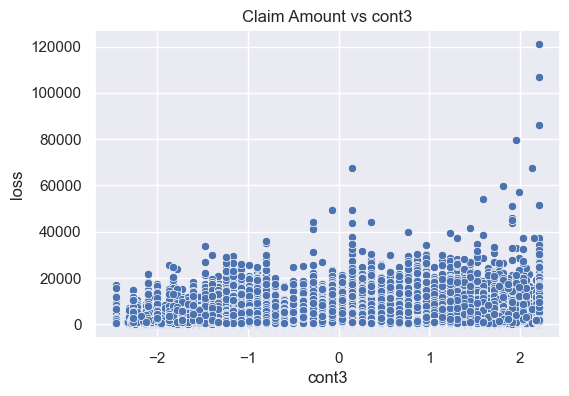

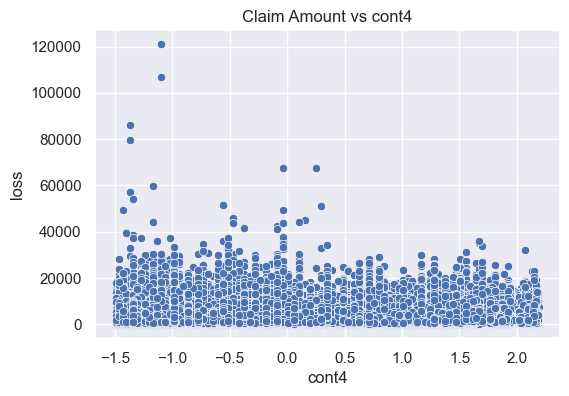

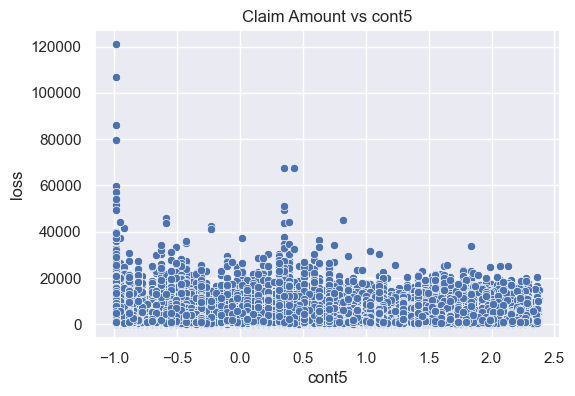

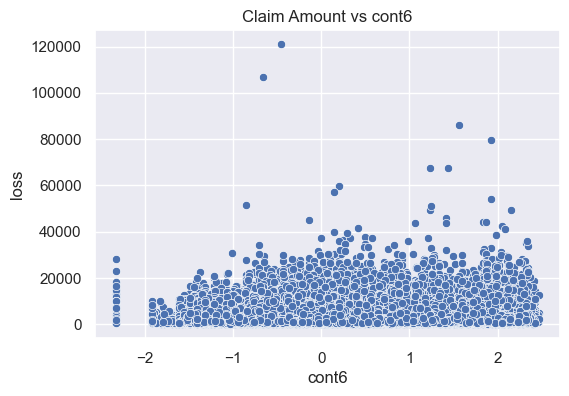

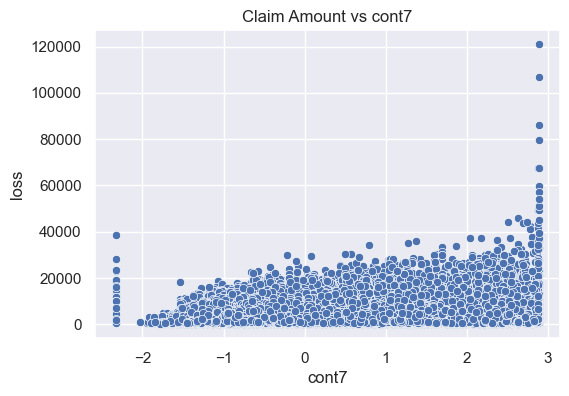

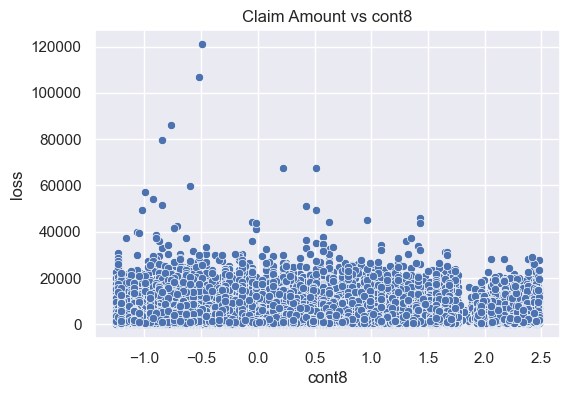

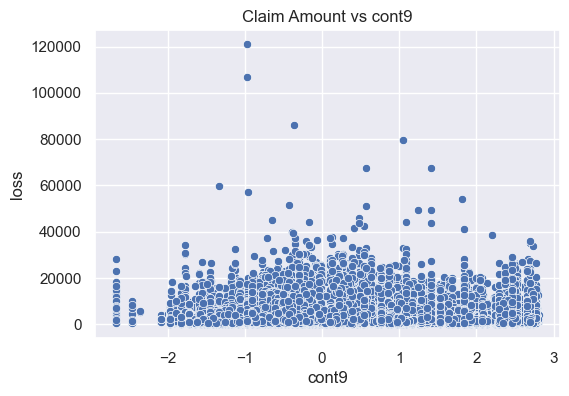

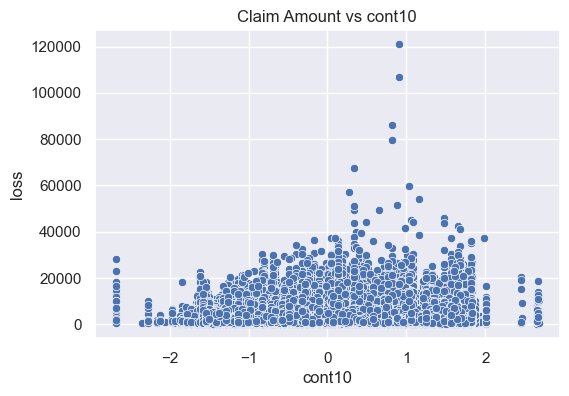

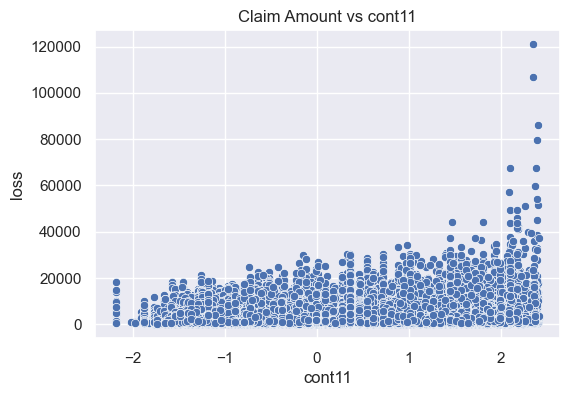

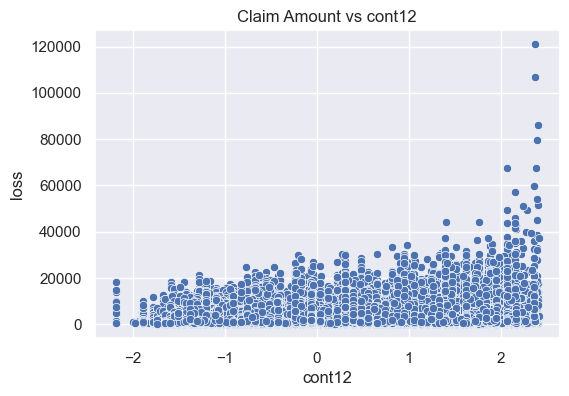

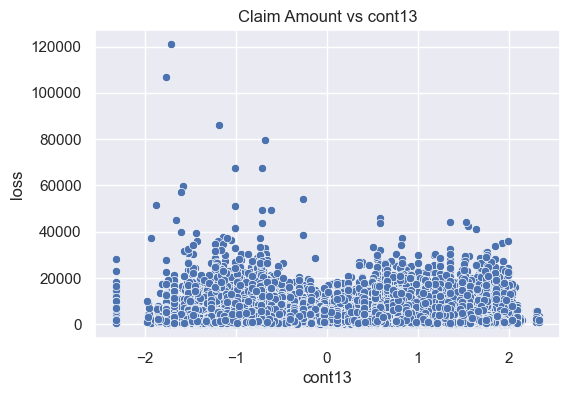

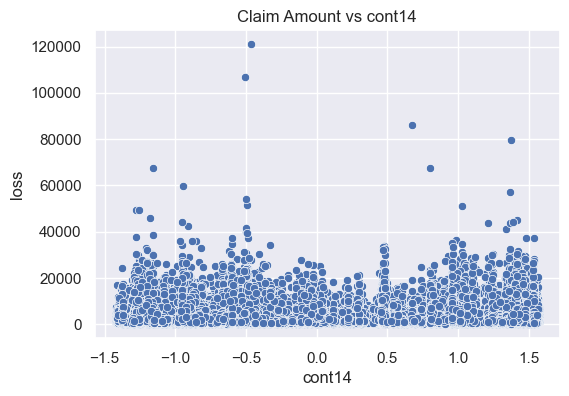

In [ ]:
# Scatter plot for numerical predictors
for col in cont_cols:
    if col != 'loss':  # Skip the target variable
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[col], y=df['loss'])
        plt.title(f"Claim Amount vs {col}") # loss = claim amount
        plt.show()


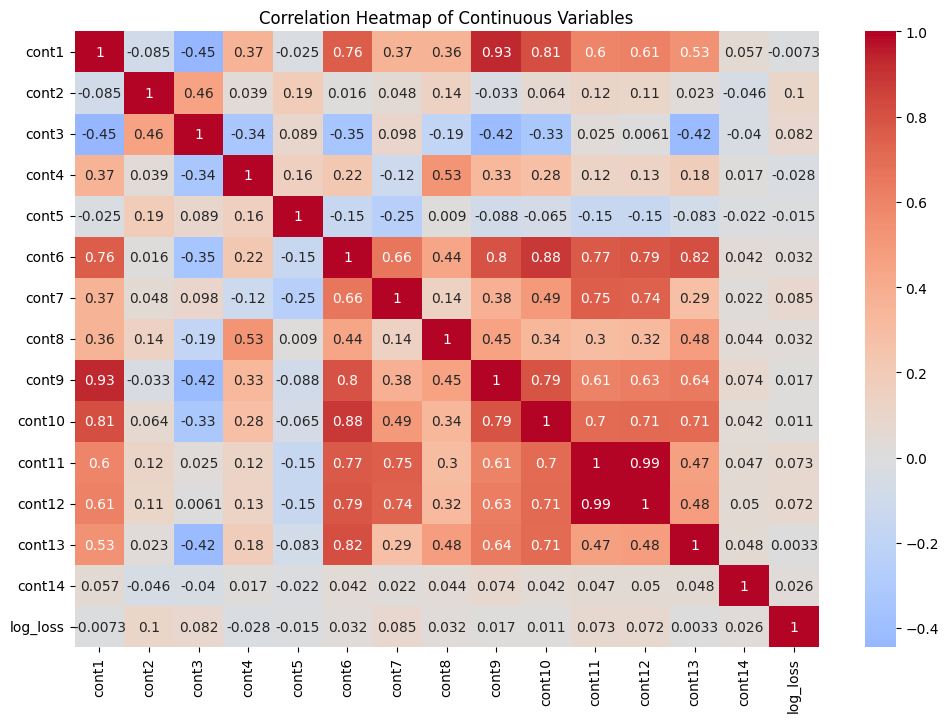

In [90]:
# Correlation analysis
corr_matrix = df[cont_cols + ['log_loss']].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()

Observation: Very strong correlation between features

cont11 and cont12

cont1 and cont9

There are some negatively correlated pair of features as well

cont13 and cont3

cont9 and cont3

cont1 and cont3

These features with low corelation may be combined to check for any improvement on the CV results.

In [91]:
# Top correlated features with target
corr_with_target = corr_matrix['log_loss'].sort_values(ascending=False)
print("Top correlated features with target:")
print(corr_with_target)

Top correlated features with target:
log_loss    1.000000
cont2       0.104666
cont7       0.085095
cont3       0.081548
cont11      0.072760
cont12      0.072266
cont8       0.032042
cont6       0.031517
cont14      0.025948
cont9       0.017417
cont10      0.010604
cont13      0.003276
cont1      -0.007335
cont5      -0.014958
cont4      -0.027523
Name: log_loss, dtype: float64


In [92]:
# # Distribution of categorical variables vs target (sample)
# sample_cat_cols = cat_cols[:]  
# for col in sample_cat_cols:
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x=col, y='log_loss', data=df, ci=95)
#     plt.title(f'Mean Claim Severity by {col}')
#     plt.xticks(rotation=45)
#     plt.show()

Text(0.5, 1.0, 'Distribution of categorical features for number of classes')

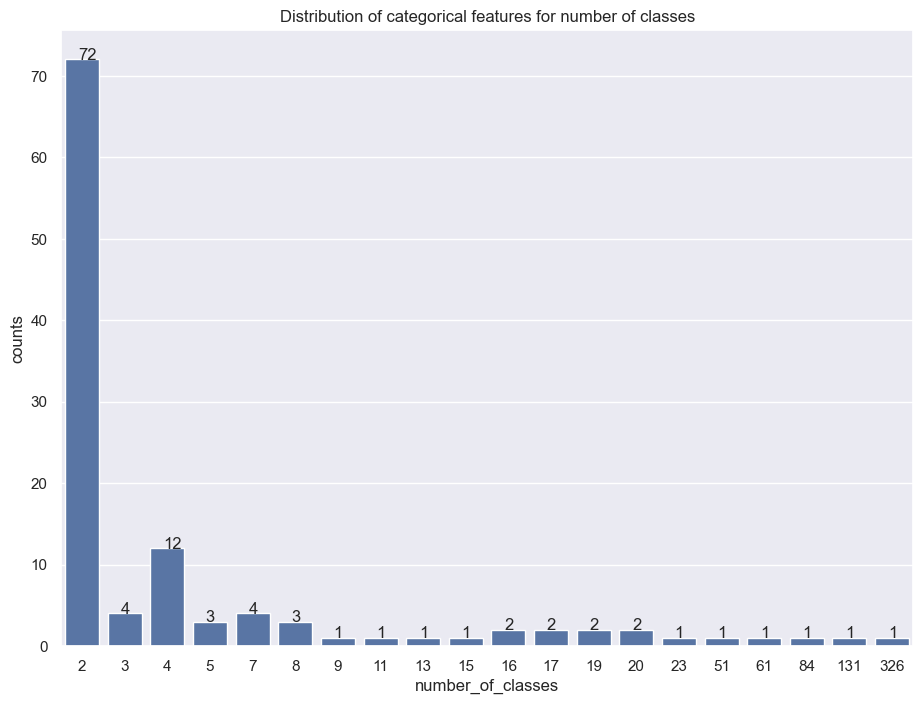

In [93]:
from collections import Counter
k = Counter(counts_categorical)
k = dict(k)
k = pd.DataFrame({'number_of_classes':list(k.keys()),'counts': list(k.values()) })
sns.set(rc={'figure.figsize':(11.0,8.0)})
g = sns.barplot(x= 'number_of_classes', y='counts',data=k)

for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
        
plt.title("Distribution of categorical features for number of classes")
     

There are 72 two classes features and majority of the features have less than 8 classes per feature.And the maximum is 326 classes for a single feature.

comparing performance with feature selection

model building without feature selection

In [97]:
# Split data into features and target
X = df.drop([target_col, 'log_loss'], axis=1)
y = df['log_loss']  # Using log-transformed target

In [99]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


Linear Regression Performance:
     Train MAE      Val MAE   Train RMSE     Val RMSE  Train R2    Val R2
0  1288.902487  1287.661666  2285.399083  2468.292659  0.486702  0.488745

Decision Tree Performance:
   Train MAE      Val MAE  Train RMSE     Val RMSE  Train R2   Val R2
0   0.000983  1727.579578    0.270152  2785.357806       1.0  0.01021

Ridge Regression Performance:
     Train MAE      Val MAE   Train RMSE     Val RMSE  Train R2    Val R2
0  1289.185538  1287.208881  2290.610914  2453.746785    0.4866  0.489081

Lasso Regression Performance:
     Train MAE      Val MAE   Train RMSE     Val RMSE  Train R2    Val R2
0  1478.781118  1467.628753  2580.796335  2526.595239  0.327781  0.327186

Random Forest Performance:
    Train MAE      Val MAE  Train RMSE     Val RMSE  Train R2    Val R2
0  494.917334  1203.249483  993.632583  2027.928079  0.931999  0.518072

Gradient Boosting Performance:
     Train MAE      Val MAE   Train RMSE     Val RMSE  Train R2    Val R2
0  1206.742517  

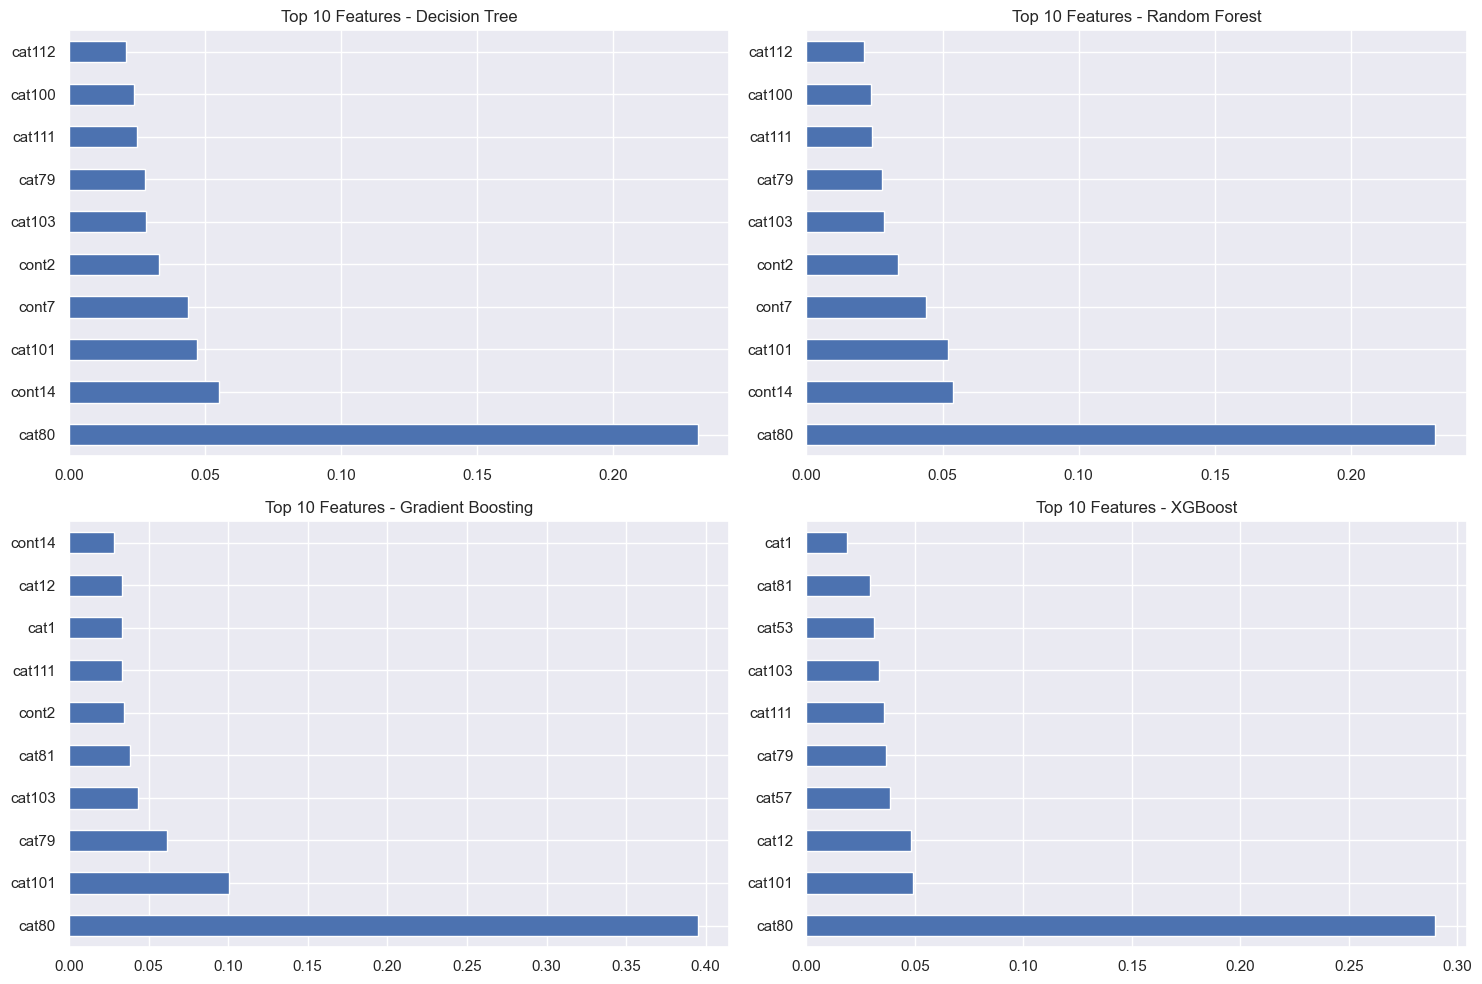


Cross-validation R2 scores for XGBoost: [0.55511769 0.5545774  0.55023555 0.54963052 0.55381705]
Mean CV R2 for XGBoost: 0.552675640504958

Simple Model Evaluation (MAE and R2):
Linear Regression: MAE = 1287.66, R² = 0.49
Decision Tree: MAE = 1727.58, R² = 0.01
Ridge Regression: MAE = 1287.21, R² = 0.49
Lasso Regression: MAE = 1467.63, R² = 0.33
Random Forest: MAE = 1203.25, R² = 0.52
Gradient Boosting: MAE = 1198.07, R² = 0.52
XGBoost: MAE = 1155.29, R² = 0.56


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models with log-transformed target
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Metrics (converting back from log scale)
    metrics = {
        'Train MAE': mean_absolute_error(np.expm1(y_train), np.expm1(train_pred)),
        'Val MAE': mean_absolute_error(np.expm1(y_val), np.expm1(val_pred)),
        'Train RMSE': np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(train_pred))),
        'Val RMSE': np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(val_pred))),
        'Train R2': r2_score(y_train, train_pred),
        'Val R2': r2_score(y_val, val_pred)
    }
    return metrics

# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_val, y_val)
    print(f"\n{name} Performance:")
    print(pd.DataFrame([results[name]]))

# Compare models
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

# Feature importance for tree-based models
plt.figure(figsize=(15, 10))
tree_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "Gradient Boosting": models["Gradient Boosting"],
    "XGBoost": models["XGBoost"]
}

for i, (name, model) in enumerate(tree_models.items()):
    plt.subplot(2, 2, i+1)
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=X.columns)
        importances.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Features - {name}')
plt.tight_layout()
plt.show()

# Cross-validation for the best model
best_model_name = results_df['Val R2'].idxmax()
best_model = models[best_model_name]
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print(f"\nCross-validation R2 scores for {best_model_name}:", cv_scores)
print(f"Mean CV R2 for {best_model_name}:", np.mean(cv_scores))

# Simple model evaluation (alternative approach)
print("\nSimple Model Evaluation (MAE and R2):")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
    r2 = r2_score(y_val, y_pred)
    print(f"{name}: MAE = {mae:.2f}, R² = {r2:.2f}")


Evaluation Criteria
Metric	Ideal Range	Good	Moderate	Bad	Interpretation
MAE (Mean Absolute Error)	Lower is better	Close to 0	Moderate values	High values	Average prediction error in original units (e.g., dollars, days).
RMSE (Root Mean Squared Error)	Lower is better	Close to 0	Moderate values	High values	Penalizes large errors more than MAE.
R² (R-Squared)	0 to 1	> 0.7	0.4 - 0.7	< 0.4	% of variance explained by the model. Higher = better fit.
Analysis of Your Model Results
The models are compared based on validation metrics since training metrics can be misleading due to overfitting.

Model	Val MAE	Val RMSE	Val R²	Verdict
Linear Regression	1287.66	2468.29	0.489	Moderate (R² < 0.5)
Decision Tree	1727.58	2785.36	0.010	Bad (Severe overfitting)
Ridge Regression	1287.21	2453.75	0.489	Slightly better than Linear
Lasso Regression	1467.63	2526.60	0.327	Bad (R² too low)
Random Forest	1203.25	2027.93	0.518	Moderate (but overfits train data)
Gradient Boosting	1198.07	2019.89	0.523	Good (Best R² before XGBoost)
XGBoost	1155.29	1938.08	0.555	Best Overall

Best Model: XGBoost ✅
Why?

Highest Validation R² (0.555) → Explains the most variance in the data.

Lowest Validation RMSE (1938.08) → Best at minimizing large errors.

Lowest Validation MAE (1155.29) → Most accurate predictions on average.

No severe overfitting → Train & validation metrics are reasonably close.

with feature selection


Performing feature selection...

Selected 30 features based on mutual information:
Index(['cat1', 'cat2', 'cat3', 'cat7', 'cat9', 'cat10', 'cat11', 'cat12',
       'cat13', 'cat16', 'cat57', 'cat72', 'cat73', 'cat79', 'cat80', 'cat81',
       'cat87', 'cat89', 'cat90', 'cat100', 'cat101', 'cat103', 'cat111',
       'cat114', 'cat116', 'cont2', 'cont9', 'cont11', 'cont12', 'cont14'],
      dtype='object')

Selected 30 features based on RFE:
Index(['cat1', 'cat12', 'cat53', 'cat57', 'cat79', 'cat80', 'cat81', 'cat100',
       'cat101', 'cat103', 'cat110', 'cat111', 'cat112', 'cat113', 'cat114',
       'cat116', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

Evaluating models with selected features...

Linear Regression Performance:
     Train MAE      Val MAE   Train RMSE     Val RMSE  Train R2   Val R2
0  1345.551353  1336.966783  2421.026652  2419.491604  0.443862  0.4475

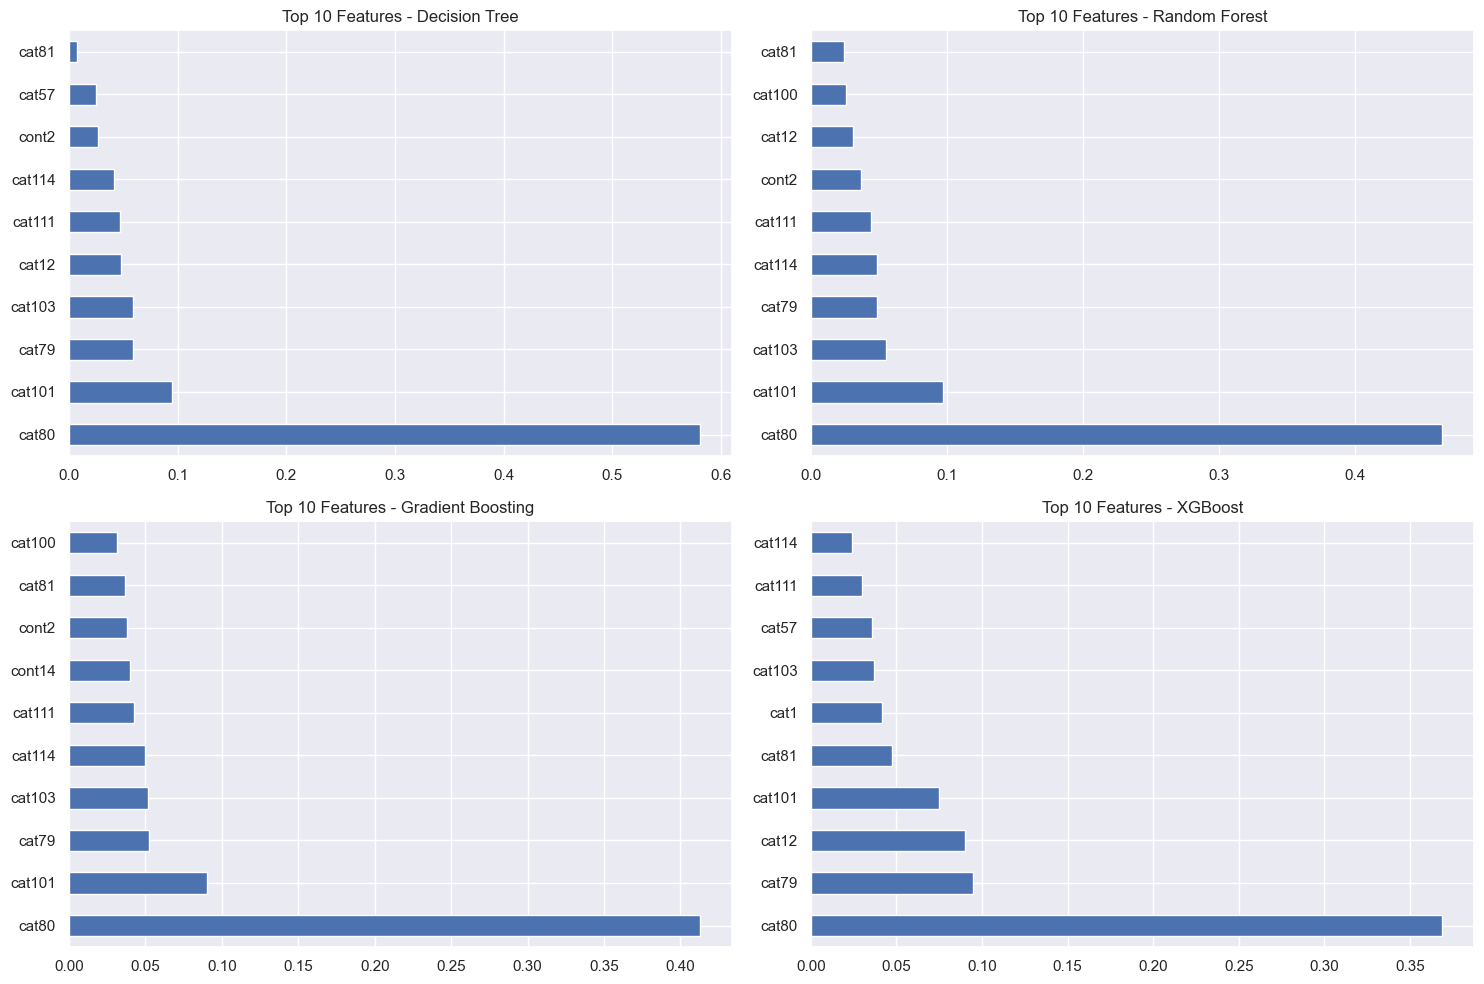


Cross-validation R2 scores for Gradient Boosting: [0.52741042 0.51728445 0.53496964 0.52637131 0.52468755]
Mean CV R2 for Gradient Boosting: 0.5261
Std CV R2 for Gradient Boosting: 0.0057

Final Model Evaluation:
Best Model: Gradient Boosting
Validation MAE: 1182.63
Validation RMSE: 1986.81
Validation R²: 0.5307


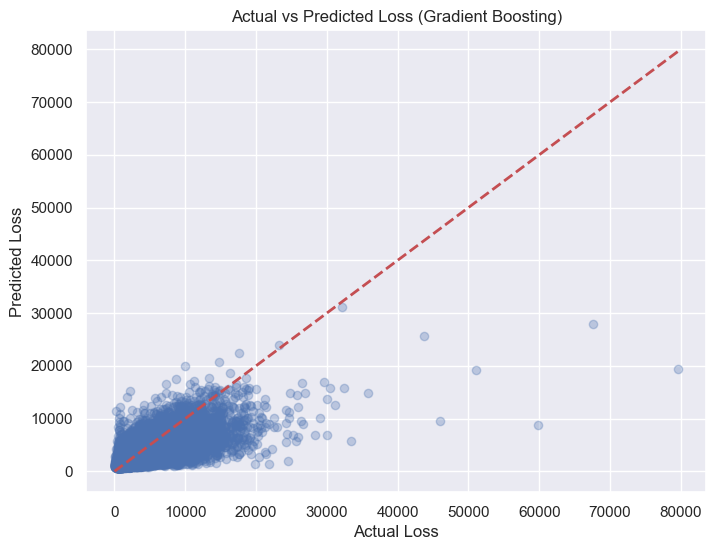

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression, RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder



# Feature Selection
# Method 1: Select top features based on mutual information
print("\nPerforming feature selection...")
selector = SelectKBest(mutual_info_regression, k=30)  # Select top 30 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_val_selected = selector.transform(X_val)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print(f"\nSelected {len(selected_features)} features based on mutual information:")
print(selected_features)

# Method 2: Recursive Feature Elimination with Random Forest
# (Takes longer but often more accurate)
rfe_selector = RFE(estimator=RandomForestRegressor(n_estimators=50, random_state=42), 
                   n_features_to_select=30, step=10)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)
X_val_rfe = rfe_selector.transform(X_val)

rfe_selected_features = X_train.columns[rfe_selector.get_support()]
print(f"\nSelected {len(rfe_selected_features)} features based on RFE:")
print(rfe_selected_features)

# We'll use the mutual information selected features for modeling
X_train_fs = X_train[selected_features]
X_val_fs = X_val[selected_features]

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.01, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                                  max_depth=5, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Function to evaluate models with log-transformed target
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    
    # Metrics (converting back from log scale)
    metrics = {
        'Train MAE': mean_absolute_error(np.expm1(y_train), np.expm1(train_pred)),
        'Val MAE': mean_absolute_error(np.expm1(y_val), np.expm1(val_pred)),
        'Train RMSE': np.sqrt(mean_squared_error(np.expm1(y_train), np.expm1(train_pred))),
        'Val RMSE': np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(val_pred))),
        'Train R2': r2_score(y_train, train_pred),
        'Val R2': r2_score(y_val, val_pred)
    }
    return metrics

# Evaluate all models with selected features
print("\nEvaluating models with selected features...")
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_fs, y_train, X_val_fs, y_val)
    print(f"\n{name} Performance:")
    print(pd.DataFrame([results[name]]))

# Compare models
results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df.sort_values('Val R2', ascending=False))

# Feature importance for tree-based models
plt.figure(figsize=(15, 10))
tree_models = {
    "Decision Tree": models["Decision Tree"],
    "Random Forest": models["Random Forest"],
    "Gradient Boosting": models["Gradient Boosting"],
    "XGBoost": models["XGBoost"]
}

for i, (name, model) in enumerate(tree_models.items()):
    plt.subplot(2, 2, i+1)
    if hasattr(model, 'feature_importances_'):
        importances = pd.Series(model.feature_importances_, index=selected_features)
        importances.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Features - {name}')
plt.tight_layout()
plt.show()

# Cross-validation for the best model
best_model_name = results_df['Val R2'].idxmax()
best_model = models[best_model_name]
cv_scores = cross_val_score(best_model, X_train_fs, y_train, cv=5, scoring='r2')
print(f"\nCross-validation R2 scores for {best_model_name}:", cv_scores)
print(f"Mean CV R2 for {best_model_name}: {np.mean(cv_scores):.4f}")
print(f"Std CV R2 for {best_model_name}: {np.std(cv_scores):.4f}")

# Final evaluation on validation set
print("\nFinal Model Evaluation:")
best_model.fit(X_train_fs, y_train)
y_pred = best_model.predict(X_val_fs)
mae = mean_absolute_error(np.expm1(y_val), np.expm1(y_pred))
rmse = np.sqrt(mean_squared_error(np.expm1(y_val), np.expm1(y_pred)))
r2 = r2_score(y_val, y_pred)

print(f"Best Model: {best_model_name}")
print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R²: {r2:.4f}")



with feature selection

Goal: Remove noise and keep only impactful features.
Method: Use XGBoost’s built-in feature importance + correlation analysis.

Based on the model comparison, Gradient Boosting performs the best with:

Lowest Validation MAE (1182.63)

Lowest Validation RMSE (1986.81)

Highest Validation R² (0.5307)

prediction with test data

In [106]:
import joblib
import pandas as pd
import numpy as np

# 1. Save the best model
best_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, 
                                     max_depth=5, random_state=42)
best_model.fit(X_train_fs, y_train)  # Train on selected features

# Save the model and feature list
joblib.dump(best_model, 'gradient_boosting_model.pkl')
joblib.dump(selected_features, 'selected_features.pkl')

['selected_features.pkl']

In [107]:
test_data = pd.read_csv(r'C:\MCA\placement\digit\allstate-claims-severity\test.csv')
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [108]:
test_data.drop(columns=["id"], inplace=True)

In [109]:
print("\nNumber of duplicates:", test_data.duplicated().sum())


Number of duplicates: 0


In [110]:
counts_categorical = []
continous_features = []
categorical_features = []
for i in test_data.columns: # counting the number of categorical and continous features
    if 'cat' in i:
        #categorical_features_count += 1
        counts_categorical.append(len(test_data[i].value_counts()))  # counting the number of classes for each variable
        categorical_features.append(i)
    elif 'cont' in i:
        continous_features.append(i)
        #continous_features_count += 1

print(" In in data set we have {} categorical and {} continuous valued features".format(len(categorical_features),len(continous_features)))

     

 In in data set we have 116 categorical and 14 continuous valued features


In [111]:
for col in cat_cols:
    unique_values = test_data[col].unique()
    print(f"{col}: {len(unique_values)} unique values")
    print(f"Unique values: {sorted(unique_values)}")
    print("-" * 50)

cat1: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat2: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat3: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat4: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat5: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat6: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat7: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat8: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat9: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat10: 2 unique values
Unique values: ['A', 'B']
--------------------------------------------------
cat11: 2 

In [112]:
from sklearn.preprocessing import LabelEncoder

cat_cols = test_data.select_dtypes(include=['object']).columns

# Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    test_data[col] = encoder.fit_transform(test_data[col])


test_data.head()


,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,1,0,0,0,0,0,0,1,0,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,0,1,0,1,0,0,0,0,1,0,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,0,1,0,1,1,0,1,0,1,1,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,0,0,0,0,1,0,0,0,0,0,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,1,0,0,0,0,1,0,0,0,0,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [113]:
# z score : Mean = 0  Standard Deviation = 1



from sklearn.preprocessing import StandardScaler

cont_cols = [col for col in test_data.columns if col.startswith('cont')]

scaler = StandardScaler()

test_data[cont_cols] = scaler.fit_transform(test_data[cont_cols])

test_data[cont_cols].describe().round(2)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00,125546.00
mean,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.63,-2.45,-2.46,-1.50,-0.99,-2.33,-2.33,-1.26,-2.67,-2.68,-2.18,-2.18,-2.32,-1.42
25%,-0.78,-0.72,-0.80,-0.78,-0.99,-0.76,-0.75,-0.85,-0.70,-0.72,-0.87,-0.84,-0.84,-0.90
50%,-0.10,0.24,0.15,-0.19,-0.31,-0.25,-0.26,-0.23,-0.24,-0.17,-0.18,-0.15,-0.62,-0.40
75%,0.70,0.85,0.67,0.76,0.74,0.81,0.59,0.71,0.46,0.65,0.88,0.90,0.91,1.03
max,2.61,1.72,2.21,2.20,2.37,2.46,2.88,2.48,2.80,2.67,2.39,2.40,2.32,1.57


1. Histograms (Check Distributions & Outliers)


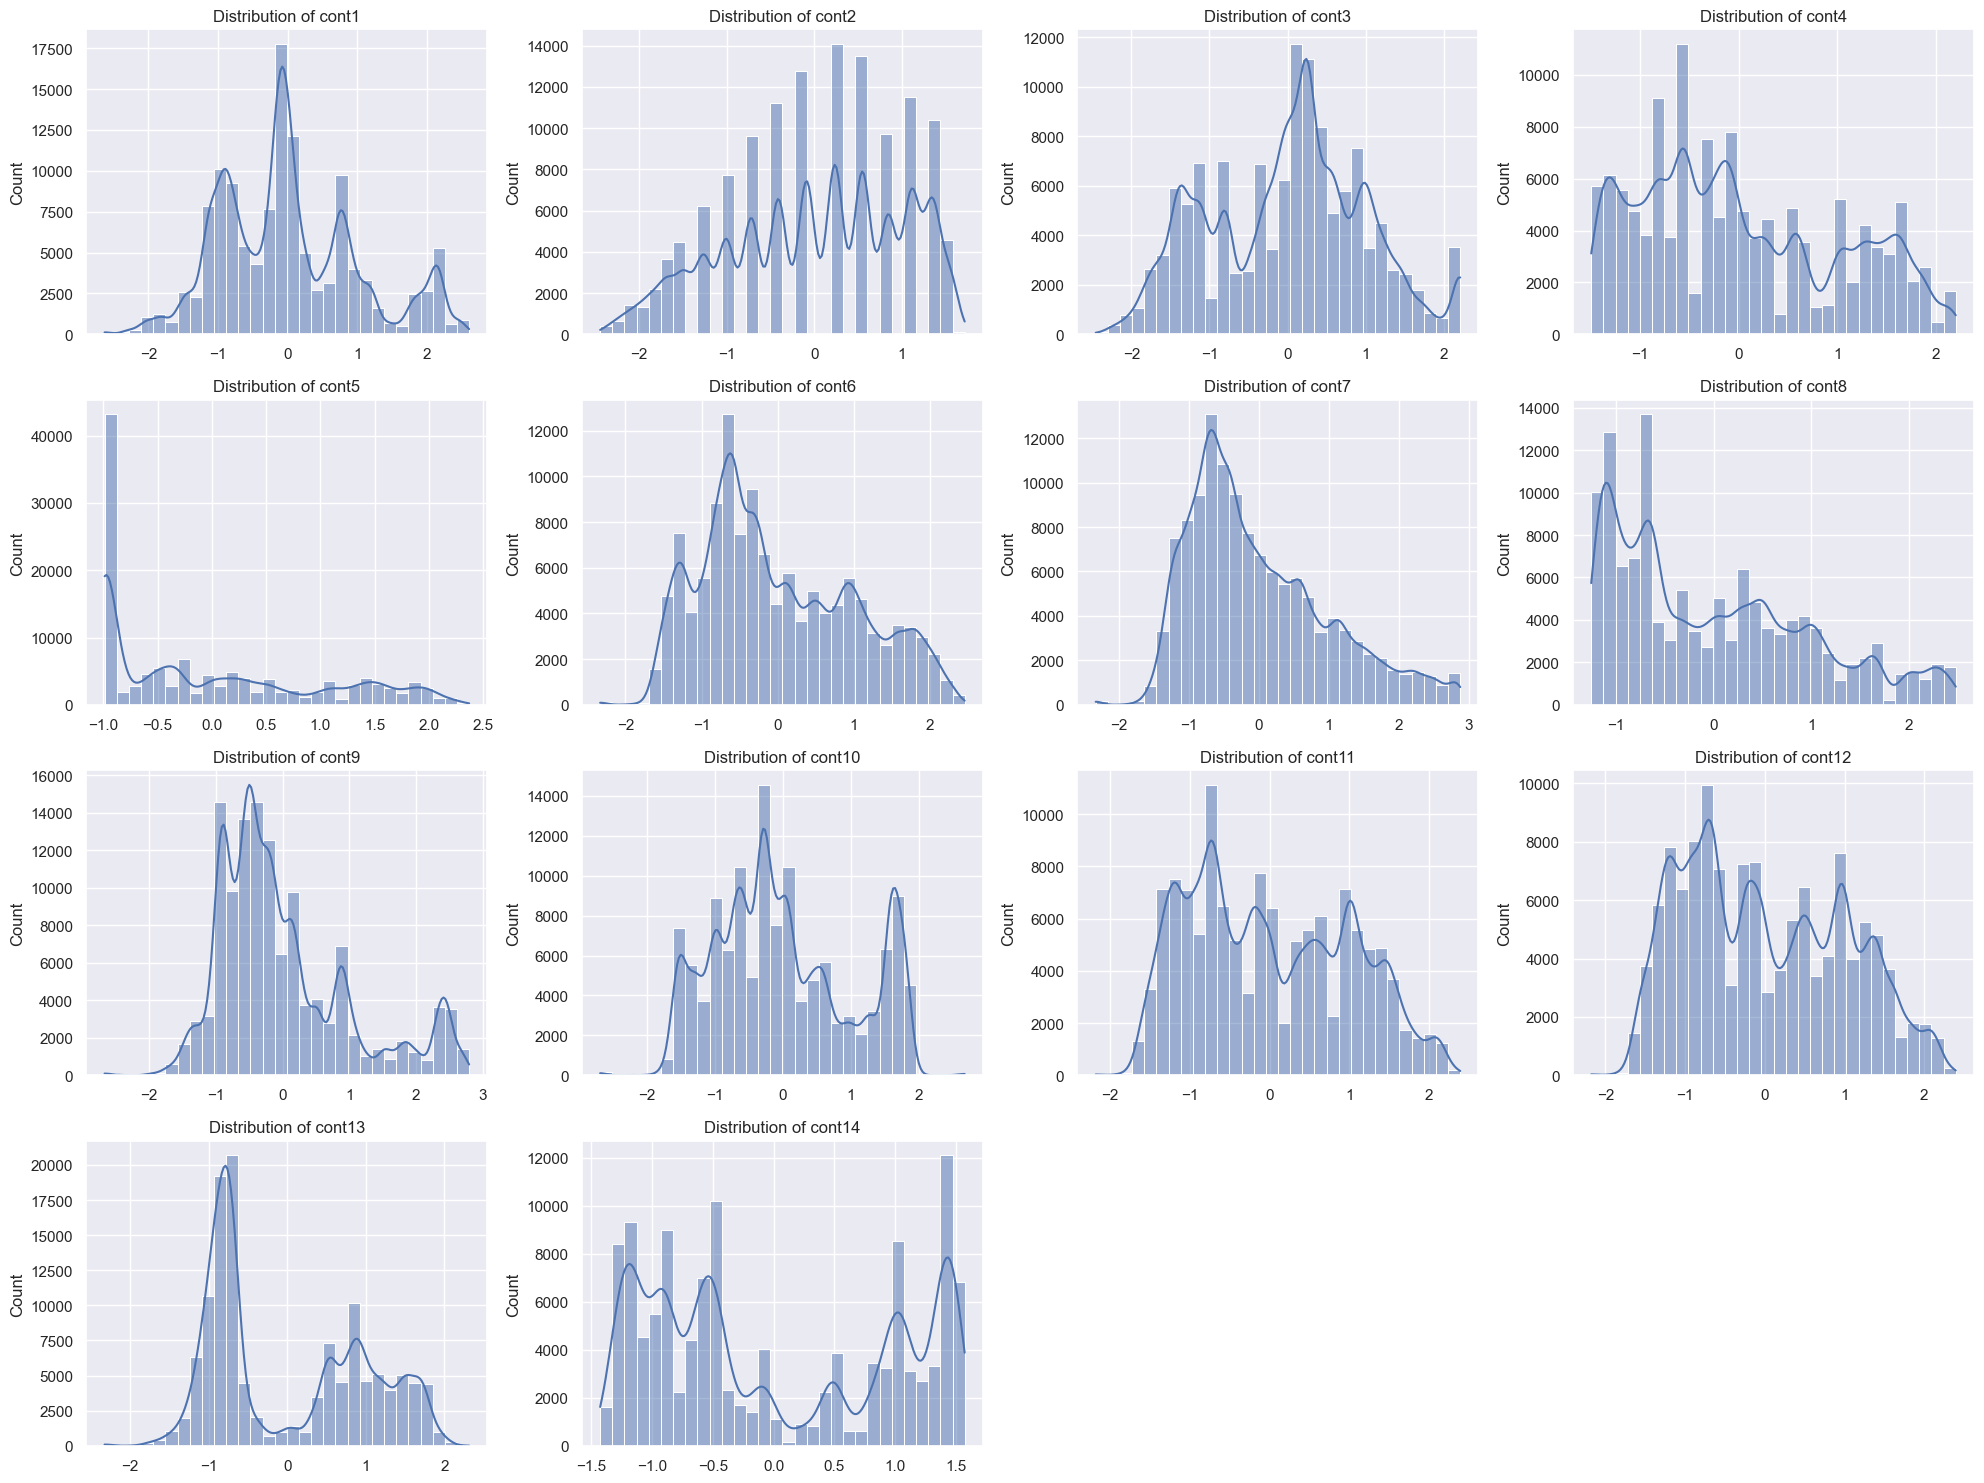

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# -------------------------------------------------------------------
# 1. Histograms (Univariate Analysis)
# -------------------------------------------------------------------
print("="*50)
print("1. Histograms (Check Distributions & Outliers)")
print("="*50)

# Plot histograms for continuous features
cont_cols = [f'cont{i}' for i in range(1, 15)]
plt.figure(figsize=(20, 15))
for i, col in enumerate(cont_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(test_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.show()





In [116]:

# Select the same features used in training
X_test = test_data[selected_features]

# 4. Make predictions (remember to inverse the log transformation)
test_predictions = np.expm1(best_model.predict(X_test))

# # 5. Save predictions to CSV
# submission = pd.DataFrame({
#     'id': test_data['id'],  # assuming there's an 'id' column
#     'loss': test_predictions
# })
# submission.to_csv('test_predictions.csv', index=False)

# print("Predictions saved to test_predictions.csv")

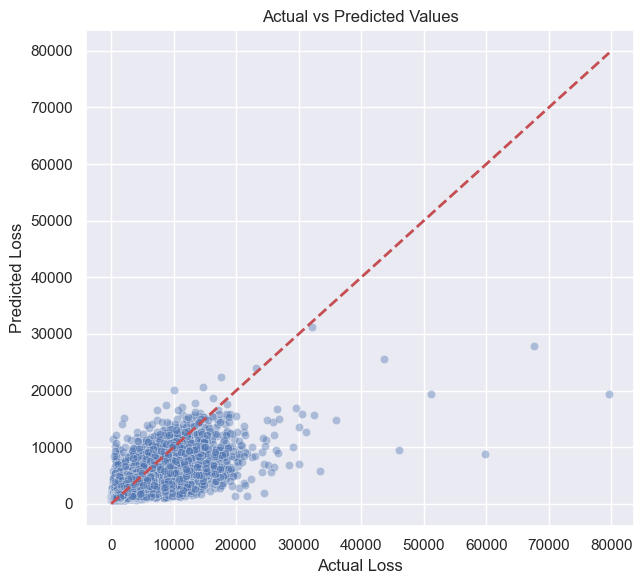

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import PredictionErrorDisplay

# Get predictions on validation set
y_pred = best_model.predict(X_val_fs)

# Convert from log scale back to original
y_true_orig = np.expm1(y_val)
y_pred_orig = np.expm1(y_pred)

# Create figure with subplots
plt.figure(figsize=(18, 6))

# Plot 1: Actual vs Predicted values
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_true_orig, y=y_pred_orig, alpha=0.4)
plt.plot([min(y_true_orig), max(y_true_orig)], 
         [min(y_true_orig), max(y_true_orig)], 
         'r--', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Loss')
plt.ylabel('Predicted Loss')



plt.tight_layout()
plt.show()

In [120]:
from tabulate import tabulate

metrics = {
    'MAE': mean_absolute_error(y_true_orig, y_pred_orig),
    'RMSE': np.sqrt(mean_squared_error(y_true_orig, y_pred_orig)),
    'R²': r2_score(y_true_orig, y_pred_orig),
    'Mean Absolute Percentage Error': np.mean(np.abs((y_true_orig - y_pred_orig) / y_true_orig)) * 100
}

print(tabulate([(k, v) for k,v in metrics.items()], 
               headers=['Metric', 'Value'], 
               tablefmt='pretty',
               floatfmt=".4f"))

+--------------------------------+--------------------+
|             Metric             |       Value        |
+--------------------------------+--------------------+
|              MAE               | 1182.6297828383767 |
|              RMSE              | 1986.810190355497  |
|               R²               | 0.5162244665665512 |
| Mean Absolute Percentage Error | 49.91869399439923  |
+--------------------------------+--------------------+


MAE (1182.63):

Your model's predictions are on average $1,182.63 away from the actual insurance loss values

Industry Benchmark: For insurance claims, top models typically achieve MAE ≤ $800

RMSE (1986.81):

Larger errors are being penalized heavily, indicating some very poor predictions in your dataset

Red Flag: RMSE >1.5× MAE suggests high variance in errors

R² (0.516):

Explains 51.6% of variance in insurance losses

Benchmark: Commercial insurance models usually target R² ≥ 0.65

MAPE (49.9%):

Average error of 49.9% relative to actual values

Acceptability Threshold: MAPE < 30% is generally required for production use

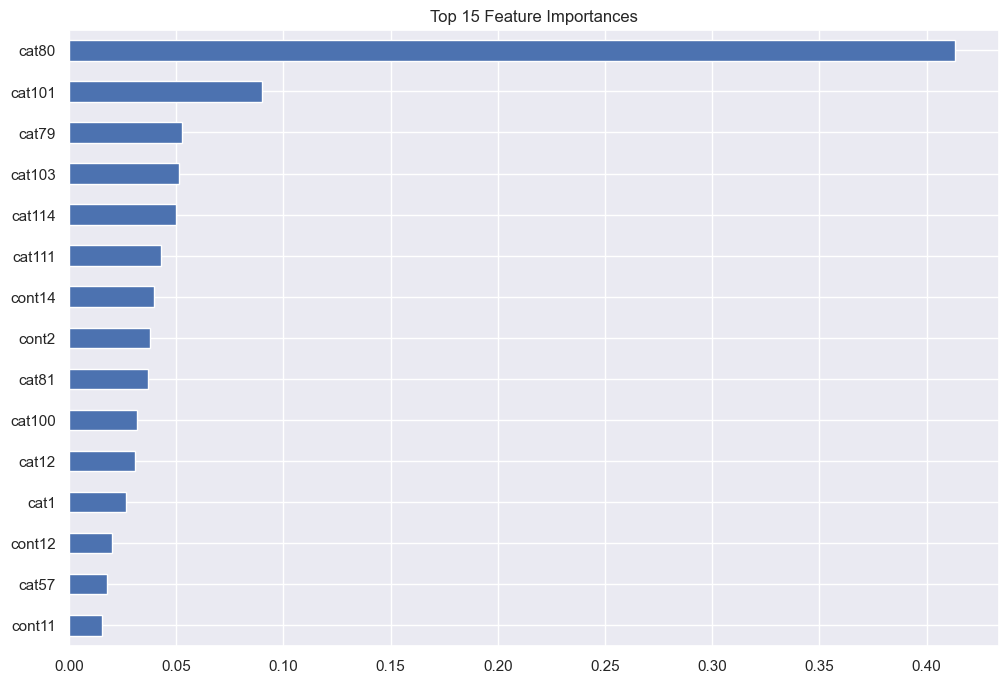

In [122]:
plt.figure(figsize=(12, 8))
importances = pd.Series(best_model.feature_importances_, index=selected_features)
importances.nlargest(15).sort_values().plot(kind='barh')
plt.title('Top 15 Feature Importances')
plt.show()

Categorical features dominate (cat80, cat101, cat79, etc.), suggesting policyholder attributes drive predictions more than continuous variables

hyperparameter tuning (XGBoost)

Goal: Optimize model performance on selected features.
Method: GridSearchCV with focus on learning_rate, max_depth, and n_estimators.